<a href="https://colab.research.google.com/github/Tiao553/Projects_Data_Science/blob/main/An%C3%A1lise_dos_Dados_do_Airbnb_Buenos_Aires%2C_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Buenos Aires, Argentina

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

**Neste *notebook*, iremos analisar os dados referentes à cidade Buenos Aires, Argentina, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

Os dados aos quais serão utilizados nesta análise é uma forma resumida do repósitorio, onde é possível o download por meio do seguinte [link](http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-12-24/visualisations/listings.csv). O arquivo possui nome de `listing.csv`, encontrado na seção correspondente à Buenos Aires. Existe no repositório mais completo com dimenções muito maiores.

Portanto, vamos fazer a importação da bibliotecas para suscitar a manipulação e análises dos dados:

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import folium 
from sklearn.impute import SimpleImputer

#   Iniciando um nootbok
sns.set_style()

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-12-24/visualisations/listings.csv')


## Análise dos Dados

Primeiramente,vamos definir os **objetivos** para o notebook:

> 1.    Verificar e se necessário fazer a **limpeza dos dados**;

> 2.    Realizar uma **análise exploratória dos dados**;

> 3.    Gerar **conclusões** sobre os dados;

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
print('As 5 primeiras entradas:')
df.head()

As 5 primeiras entradas:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,4998,2,26,2019-11-28,0.25,1,0
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,2249,1,20,2017-12-11,0.15,1,365
2,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2499,1,1,2018-12-18,0.04,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2499,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B pvt bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2499,1,10,2019-11-27,0.44,7,0


### **Dicionário das variáveis**

Conhecer cada atributo ou *features* do dataset é  impotante para que possamos analisar cada dado. Para isso, montamos o seguinte dicionário das variáveis que vai nos ajudar entender os dados.

* `id ` : Número de identificação do usuário;
* `name` : Nome do imóvel anunciado;
* `host_id` : Número de identificação do gestor do imóvel;
* `host_name` : Nome do propietário do imóvel;
* `neighbourhood_group` : Valores desta varivel se encontra faltante. Dessa forma não foi possível determinar as características do atributo;
* `neighbourhood` : Bairro da localidade do imóvel;
* `latitude`  : Número de indentificação global latitudinal;
* `longitude` : Número de indentificação global longitudinal;
* `room_type`: Tipo de disponibilidade do imóvel;
* `price`: Valor de alocação;
* `minimum_nights`: Número mínimo de noites presentes no imóvel;
* `number_of_reviews`: Número de review do imóvel;
* `last_review`: Data do último review realizado;
* `reviews_per_month`: Quantidade de reviews médios realizados por mês;
* `calculated_host_listing_count`: Quantidade de imóveis do gestor;
* `availability_365`: Número de dias dispóniveis em um ano; 



### **Verificando os dados**

Sabendo-se um pouco mais agora sobre o dataset, vamos verificar o volume dos dados de modo a identificar o número de colunas e linhas, como também verificar os tipos das *features* para entendermos a dimenção dos dados e da analise.

In [ ]:
#  --> Dimeção do banco
print(10*'-', " DIMENSÕES DO BANCO DE DADOS ", 10*'-')
print("\n" , 10*' ', "Entradas:\t{}".format(df.shape[0]))
print("\n" , 10*' ', "Feature's:\t{}".format(df.shape[1]))
print(51*'-')

#   Indentificando os tipos das variaveis
print("Tipos por feature:","\t ")
print(' ')
df.dtypes

----------  DIMENSÕES DO BANCO DE DADOS  ----------

            Entradas:	20636

            Feature's:	16
---------------------------------------------------
Tipos por feature: 	 
 


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

 Ao exibirmos as primeiras entradas e o dimencionamento podemos gerir algumas conclusões iniciais onde podemos salientar:

* Com a análise dos tipos das variáveis foi possível verificar que maioria númerica e por meio desta analise podemos nos nortear caso for necessário uma correção de arquivos faltantes.

* A *feature* `neighbourhood_group` apresenta muitos valores faltantes e podemos verificar se isso se estende por todo dataset. Caso sim, devemos exclui-lá.

* Algumas outras *features* apresetam valores faltantes, como a coluna `last_review` e `reviews_per_mouth`, mas antes de qualquer ação corretiva vamos verificar a porcentagem de valores faltantes (**NaN**).

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.300688
last_review                       0.300688
name                              0.000242
host_name                         0.000194
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

**Portanto** , podemos constatar que a *feature* `neighbourhood_group` contem somente valores faltantes. Além disso, as *fetures* `reviews_per_month`, `last_review`, `name` e `host_name` aprensetam valores faltantes. Contudo, podemos excluir a coluna `neighbourhood_group`  uma vez que ela não demonstra nenhum carecterística para o dataset e vamos tratar os dados das colunas com valores faltantes.


In [ ]:
#   Excluindo a coluna sem valores.
del df['neighbourhood_group']

#   Corrigindo os valores faltantes.

#   Para as variveis numéricas
imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
imputer = imputer.fit(df[['last_review','reviews_per_month']])
df[['last_review','reviews_per_month']] = imputer.transform(df[['last_review','reviews_per_month']])


#   Para variáveis categóricas
imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 'Not_insert')
imputer = imputer.fit(df[['host_name','name']] )
df[['host_name','name']] = imputer.transform(df[['host_name','name']] )

#   Verificação final
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
last_review                       0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
host_name                         0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

Como mostrado, podemos visualizar que a **porcentangem de valores faltantes foi zerada** e a **coluna totalmente nula foi removida. ** Desta forma, finalizamos a parte de limpeza do dataset e podemos fazer analise exploratória dos dados. Onde esta tem por finalidade verificar os pesos dos atributos, assim como overfitting dos dados.

### **Análise exploratória**

Para análise explorátoria vamos **identificar falhas nos dados**, como tambem indentificar uma relação entre os dados de **interesses simulares**.

Sendo assim vamos verificar se alguma coluna possui quantos **valores unicos**:

In [ ]:
# valores únicos
print("\nVALORES ÚNICOS:")
print(df.nunique().sort_values())


VALORES ÚNICOS:
room_type                             4
neighbourhood                        48
calculated_host_listings_count       48
minimum_nights                       65
number_of_reviews                   279
availability_365                    366
reviews_per_month                   480
last_review                        1576
price                              1896
host_name                          3394
latitude                           6914
longitude                          9072
host_id                           12788
name                              19951
id                                20636
dtype: int64


Podemos verificar que temos **quatro tipos de imóveis** e podemos verificar o quando essa informação se relaciona com as outras. Como também que tem-se **48 bairros** onde vamos verificar a distribuição em relação as outras Features. 

Dessa forma, vamos verificar os gráficos de cada *feature* pela contagem de valores encontrados com a finalidade de encontrar dados com **overfitting**, que consiste em valores distoantes da distribuição dos dados:

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

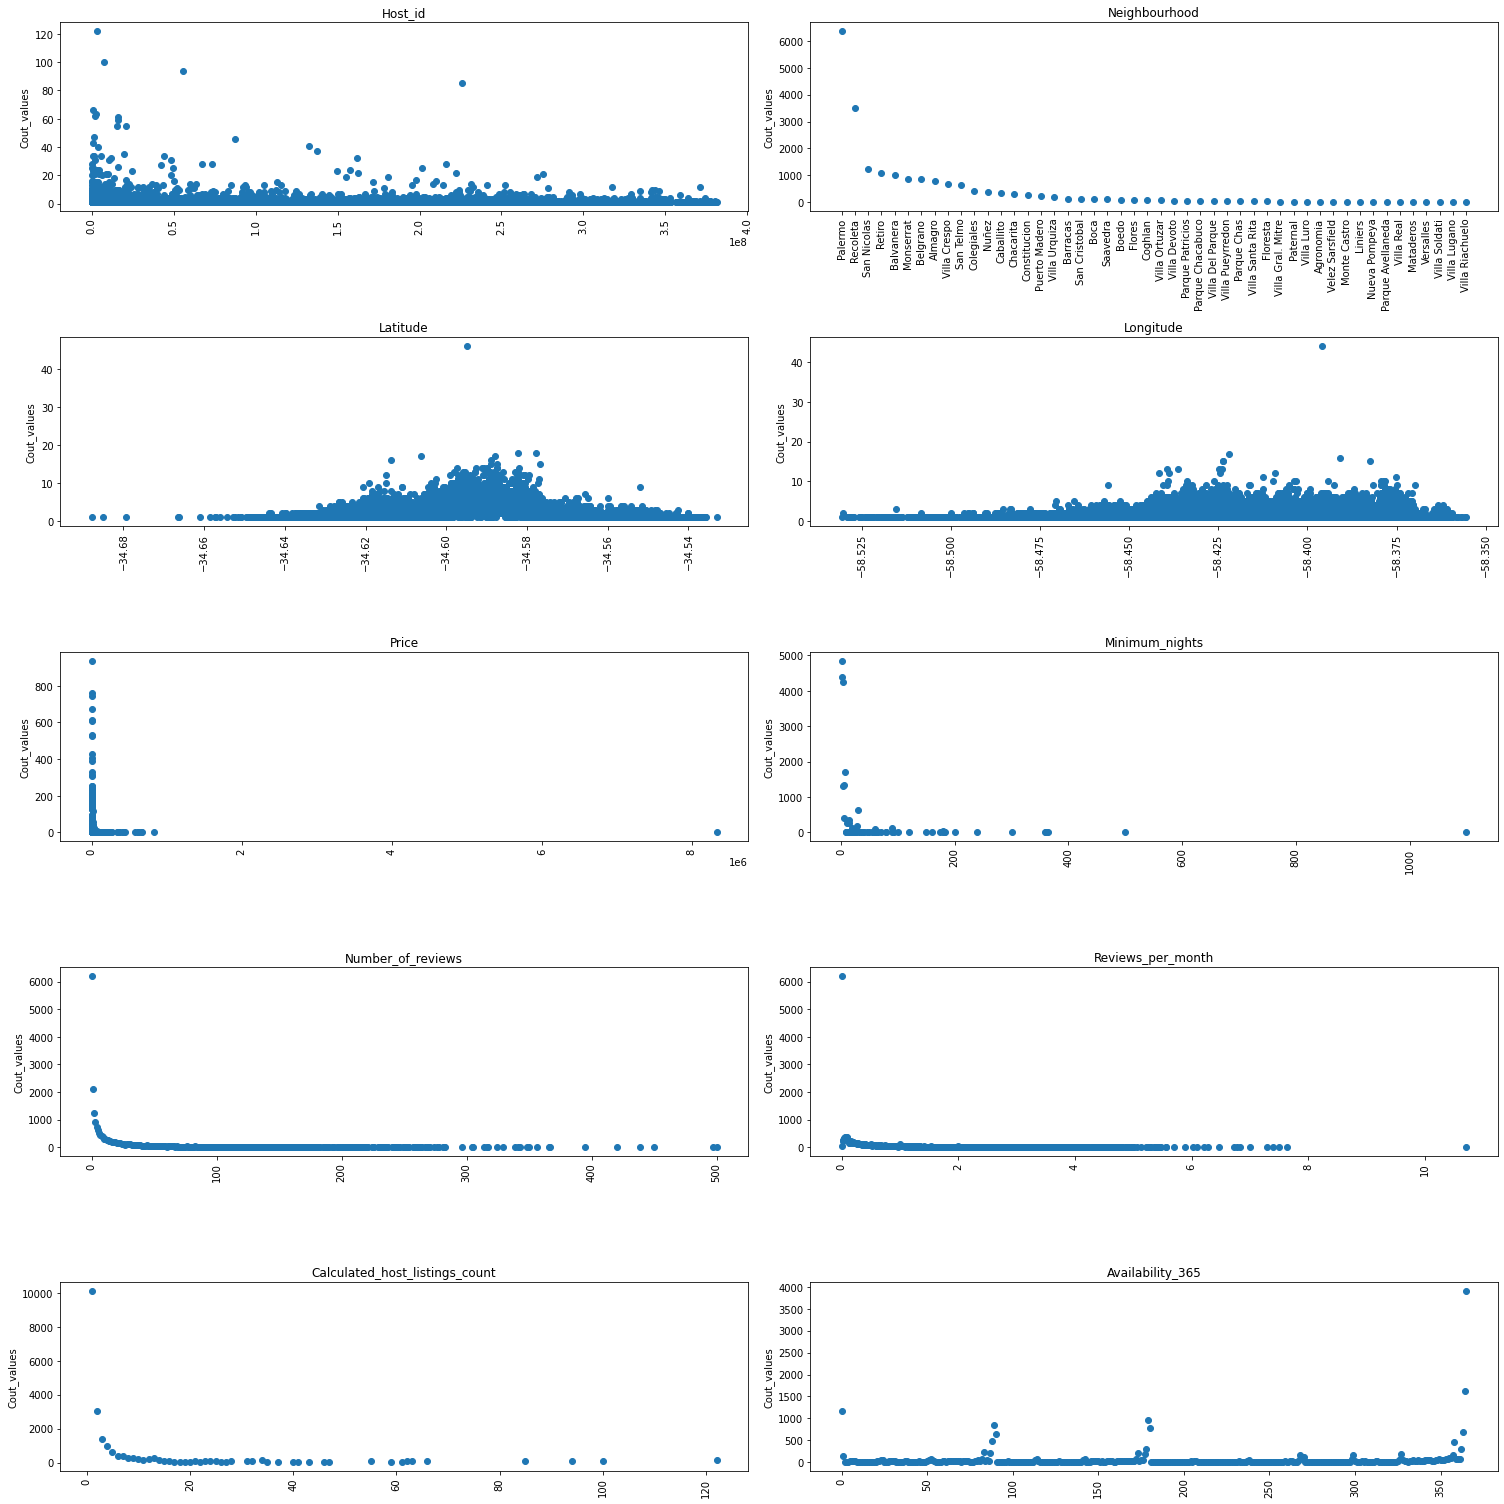

In [ ]:
# plotar o scatter das variáveis numéricas
j = 0 ; k = 0; 
colu = df[['host_id',
           'neighbourhood',
           'latitude',
           'longitude',
           'price',
           'minimum_nights',
           'number_of_reviews',
           'reviews_per_month',
           'calculated_host_listings_count',
           'availability_365']]
fig,a =  plt.subplots(5,2,figsize=(21,21))
for i in colu:
    ki = colu[i].value_counts()
    a[j][k].scatter(x = ki.index , y = ki )
    a[j][k].set_title(i.capitalize())
    a[j][k].set_ylabel('Cout_values')
    a[j][k].tick_params('x',labelrotation = 90)
    if (k < 1): k += 1;
    else : j +=1 ; k = 0
plt.tight_layout() 
plt.xticks(rotation=90) 

Pela distribuição dos scatter, gráfico que dados os valores únicos das features fazem uma contagem da ocorrencia, gerados podemos tirar algumas conclusões:
* Temos uma quantidade relativa de varios imóveis com apenas 1 dono.
* O local com mais imóveis é a região de **Palermo**.
* As *features* `Price`, `Minimum_nights`, `Number_of_reviews` parecem contar com valores com **overfitting**.

Para verificarmos os valores mais claramente vamos executar uma **análise estatitisca** e tomar novas conclusões. 


In [ ]:
# ver a média das features numéricas
colu.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.063600e+04,20636.000000,20636.000000,2.063600e+04,20636.000000,20636.000000,20636.000000,20636.000000,20636.000000
mean,1.059829e+08,-34.592599,-58.415112,4.820957e+03,6.441316,16.460845,0.489314,7.522873,231.519626
std,1.035890e+08,0.017972,0.029540,6.136472e+04,19.423860,33.570021,0.767605,17.278160,130.819993
min,2.616000e+03,-34.687870,-58.530720,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.345814e+07,-34.603170,-58.434412,1.583000e+03,2.000000,0.000000,0.000000,1.000000,90.000000
50%,6.704265e+07,-34.591740,-58.414260,2.499000e+03,3.000000,3.000000,0.160000,2.000000,267.500000
75%,1.852308e+08,-34.582200,-58.391380,3.998000e+03,5.000000,17.000000,0.650000,4.000000,364.000000
max,3.812013e+08,-34.533040,-58.355410,8.329659e+06,1100.000000,500.000000,10.710000,122.000000,365.000000


Podemos chegar as seguintes concluções iniciais para análise explorátoria:

*  A *feature* `price` tem seu maior valor valendo $8329659.0$ sendo que o valor de $75%$ dos dados equivale a $3998.0$ . Um aluguel muito caro para distribuição dos dados, logo vamos considera-lo como **overfitting**.

* A *feature* `minimum_nights` tem seu valor máximo de $1100$ noites mínimas para se estar em um imóvel. 

* A *feature* `Number_of_reviews` embora tenham valores alto de valor máximo, se analisarmos a distribuição gerada pela gráfico podemos identificar a distribuição, por este motivo não vamos considerar como ***overfitting** essa *feture* . 

Contudo, vamos verificar a quantidade de valores que estão acima da média encontrada dos valores com **overfitting**, ou seja:

In [ ]:
#   Verificando valores de minimun_nights
print(31*'-', " MINIMUM_NIGHTS ", 15*'--')
print("\nQuantidade de valores superiores a média: ",len(df[df.minimum_nights > 30]))
print("\nPorcentagem de valores superiores a média: ",len(df[df.minimum_nights > 30])/df.shape[0])
print('--'*40)

#
print(35*'-', " PRICE ", 18*'--')
print("\nQuantidade de valores superiores a média: ",len(df[df.price > 7500]))
print("\nPorcentagem de valores superiores a média: ",len(df[df.price > 7500])/df.shape[0])
print('--'*40)

-------------------------------  MINIMUM_NIGHTS  ------------------------------

Quantidade de valores superiores a média:  339

Porcentagem de valores superiores a média:  0.01642760224849777
--------------------------------------------------------------------------------
-----------------------------------  PRICE  ------------------------------------

Quantidade de valores superiores a média:  1757

Porcentagem de valores superiores a média:  0.08514246947082768
--------------------------------------------------------------------------------


Podemos verificar uma grande quantidade de valores com valor superior. Dessa maneira, vamos fazer o tratamento desses valores e verificar a dristribuição por meio do grafico novamente.


In [ ]:
# remover os *outliers* em um novo DataFrame
df.drop(df[df.price > 7500].index, axis=0, inplace=True)
df.drop(df[df.minimum_nights > 30].index, axis=0, inplace=True)

Removidos os **valores em overfitting** vamos verificar a distribuição novamente das *features* :

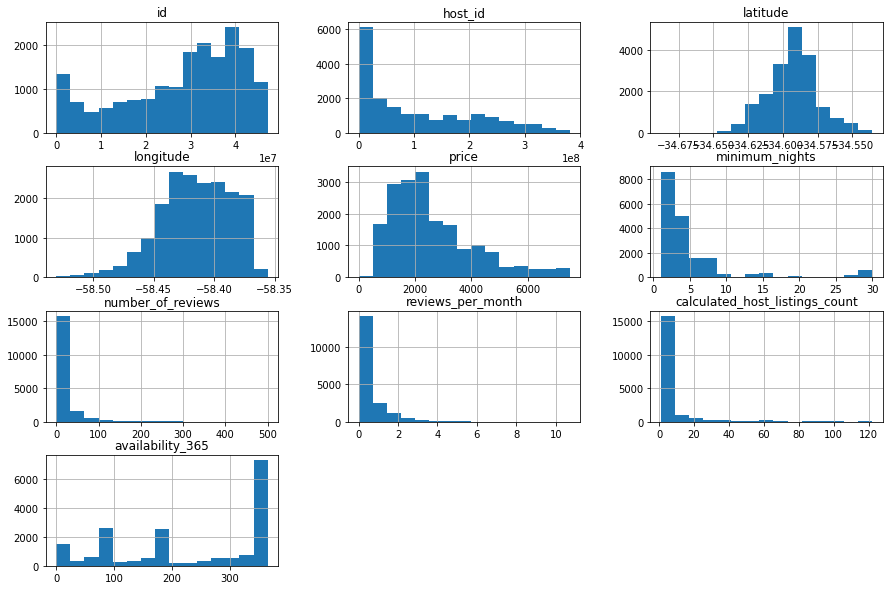

In [ ]:
df.hist(bins=15, figsize=(15,10));
plt.xticks(rotation=90)
plt.show()

### **Análise de similaridade da *features***
É deseja que encontremos relação entre os dados. Essa relação pode ser calculada por uma métrica que chama-se correlação, onde temos uma **correlação perfeita** quando este valor corresponde a $1$ e uma **anticorrelação perfeita** quando este valor está em $-1$. Além disso quando o valor se encontra próximo de zero **não correlação entre os valores comparados**.

Dessa forma, vamos gerar uma matriz de correlação, onde na diagonal encontra-se a corelação das *features* com eles própios. Seguida da matriz, temos uma exibição em forma de imagem com interação de cores para facilitar a vizualização dos valores.

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.050077,-0.001339,-0.039689,0.146110,0.054509
minimum_nights,-0.050077,1.000000,-0.082770,-0.127569,0.123254,0.011373
number_of_reviews,-0.001339,-0.082770,1.000000,0.798138,-0.065817,-0.019974
reviews_per_month,-0.039689,-0.127569,0.798138,1.000000,-0.077650,-0.089848
calculated_host_listings_count,0.146110,0.123254,-0.065817,-0.077650,1.000000,0.030054
availability_365,0.054509,0.011373,-0.019974,-0.089848,0.030054,1.000000


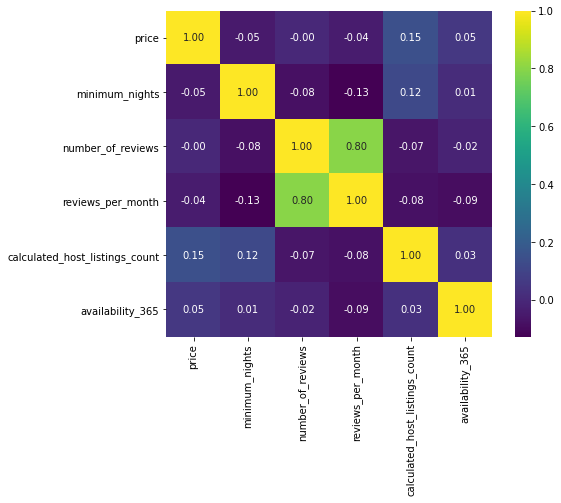

In [ ]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(8,6))

sns.heatmap(corr, fmt='.2f', cmap='viridis', square=True, linecolor='white', annot=True);

plt.show()

Se seguirmos os dados de correlação temos que somente os valores de `number_of_reviews` e `reviews_per_month` aproximam de uma correlação. Sendo assim vamos fazer mais algumas análise **mais pontuais** para geraramos algumas conclusões.

### **Tipo de imóvel Vs Preço imóvel**

Neste tópico vamos avaliar quais são os tipos de imóveis mais buscados, assim como cada tipo influencia no preço de cada local. Para isso vamos:

* Contabilizar os tipos de imóveis.
* Verificar a porcentagem de escolha dos usuários.
* Avaliar o quanto cada tipo de imóvel influencia nos preços.

logo temos a seguinte **quantidade de imóveis**:

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts(sort=True)

Entire home/apt    14425
Private room        3584
Shared room          422
Hotel room           140
Name: room_type, dtype: int64

O maior tipo de imóvel é o de **casa inteira**, seguida de **quarto privado**, **quarto compartilhado** e **quarto de hotel**. 

Vamo verificar a porcentagem da distribuição de cada um, ou seja:

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts(sort=True)/df.shape[0]

Entire home/apt    0.787410
Private room       0.182545
Shared room        0.021128
Hotel room         0.008916
Name: room_type, dtype: float64

Dessa maneira, podemos concluir que a maior parte dos imóveis disponiveis é de casa inteira. Embora este são os mais solicitados, será que estes são os mais acessiveis financeiramente? 

Para verificar, vamos utilizar a ferramenta de `boxplot` onde tem-se os pesos de cada tipo em relação aos valores.

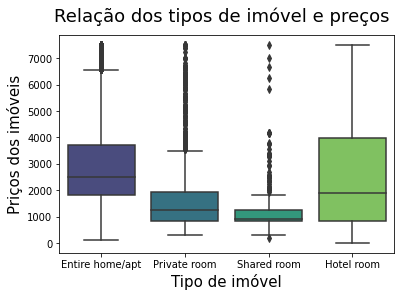

In [ ]:
#   Fazendo os boxplot
sns.boxplot(x = df['room_type'], y=df['price'], palette="viridis")
plt.suptitle('Relação dos tipos de imóvel e preços', size=18)
plt.xlabel('Tipo de imóvel', fontsize = 15)
plt.ylabel('Priços dos imóveis', fontsize = 15)

plt.show()

Assim podemos concluir:

* Observa-se que os preços de Hoteis são os mais **variados**.
* Os preços de casa inteiras são os segundos mais altos, embora sejam os mais escolhidos. Isso deve se justificar por uma maior comodidade e privacidade.
* O custo benéficio são os quatos privados, uma vez por contar com os valores de **alocação mais baixos eo segundo mais requisitado**.

### **Como os bairros influenciam no valor e na escolha dos imóveis?**

Neste tópico avaliar como cada um dos 48 bairros influenciam na escolha do local, assim como a influência no valor. Para isso vamos:

*  Avaliar a **distribuição de preço**.
*  Avaliar os **mais escolhido**s.
*  Avaliar quais os **bairos preferidos**.

Contudo, temos os **maiores preços** médios :


In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending = False) [:10]

neighbourhood
Villa Soldati    5022.333333
Puerto Madero    4716.806202
Palermo          2979.237203
Floresta         2901.642857
Retiro           2802.475996
Recoleta         2783.941860
Belgrano         2708.260759
Nuñez            2695.628492
Liniers          2591.133333
San Telmo        2548.860544
Name: price, dtype: float64

Temos acima o preço medio de cada região de Buenos Aires. Embora alguns tenham maior valor médio deve **avaliar também a sua distribuição.** Para isso vamos avaliar agora a **porcetagem de escolha** dos bairros.

In [ ]:
print('Porcetagem dos bairros mais escolhidos:')
(df.neighbourhood.value_counts(sort=True)/df.shape[0]) 

Porcetagem dos bairros mais escolhidos:


Palermo              0.298745
Recoleta             0.166712
San Nicolas          0.063109
Retiro               0.052717
Balvanera            0.052394
Monserrat            0.043616
Belgrano             0.042539
Almagro              0.040816
Villa Crespo         0.034462
San Telmo            0.031662
Colegiales           0.020031
Nuñez                0.019277
Caballito            0.017285
Chacarita            0.015616
Constitucion         0.014485
Villa Urquiza        0.009477
Puerto Madero        0.006946
San Cristobal        0.006946
Barracas             0.006516
Boca                 0.005923
Saavedra             0.005600
Boedo                0.005116
Flores               0.004954
Coghlan              0.004362
Villa Ortuzar        0.003662
Parque Patricios     0.002908
Villa Devoto         0.002800
Parque Chacabuco     0.002531
Villa Del Parque     0.002423
Parque Chas          0.001669
Villa Pueyrredon     0.001615
Villa Santa Rita     0.001562
Floresta             0.001508
Villa Gral

O bairro **Palermo** é o bairro com maior número de escolha, como também é um dos valores mais alto. Antes de concluirmos vamos verificar a taxa de variação do preço dos bairros, por meio de um `boxplot` abaixo:

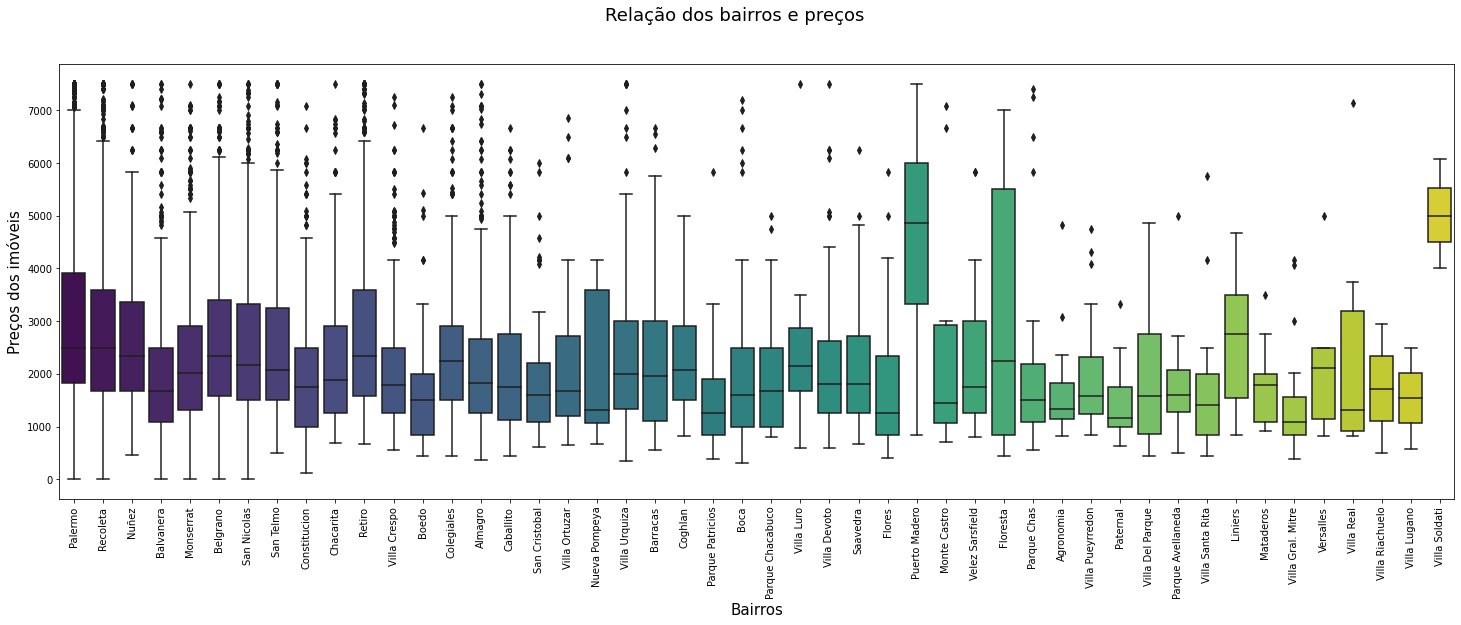

In [ ]:
#   Fazendo os boxplot
plt.figure(figsize=(25,8))
sns.boxplot(x = df['neighbourhood'], y = df['price'], palette="viridis")
plt.suptitle('Relação dos bairros e preços', size=18)
plt.xlabel('Bairros' , fontsize = 15)
plt.ylabel('Preços dos imóveis', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

Dessa forma, podemos chegar as seguintes conclusões sobre os preços:

* O bairro com maior preço é `Villa soldati`, embora sua escolha por usuários é em torno de $0.00016%$ %.
* O bairro Palermo aprenseta-se como melhor escolha, por ser o mais escolhido e ter uma **variância grande em seus preços.** Sendo assim, apresentando ser versátil e atendar a maior parte dos usuários.
* Caso o bairro `Palermo` não atenda suas necessidades, aconcelho buscar o bairro `Recoleta`. Onde este apresenta uma alta escolha dos usuários e preço semelhante ao do `Palermo` mas com uma variância reduzida.
* Se sua escolha é avaliar os preços o melhor bairro é o `Floresta`, este apresenta **a maior variância de preços**.

Assim vamos montar um grafico relacionando a latitude e a longitude mostrando a distribuição de preços pela cidade:

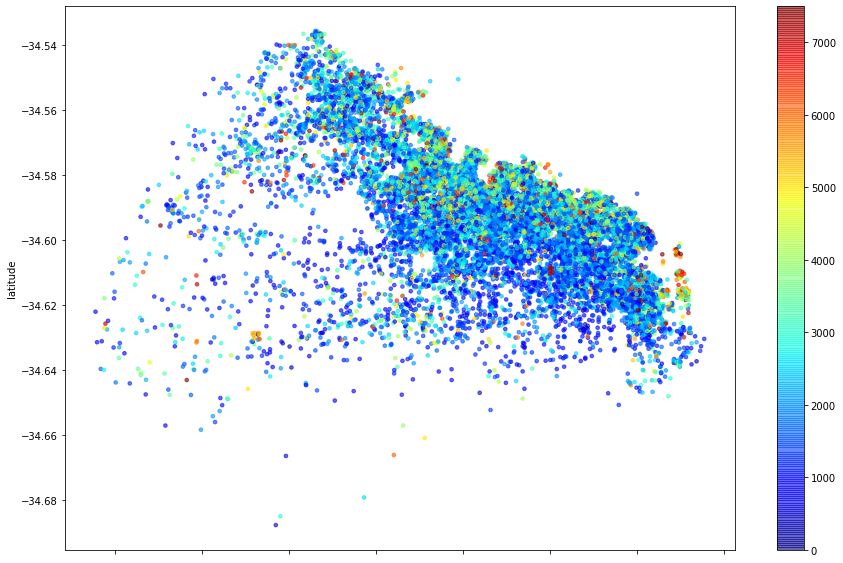

In [ ]:

df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.6,  c=df['price'], s=13,
              cmap=plt.get_cmap('jet'), figsize=(15,10));


Para efeito de comparação vamos adicionar o mapa de buenos aires:


In [ ]:

map = folium.Map(width=800, height=600,location=[-34.62, -58.41], zoom_start=11.55, max_zoom = 13, min_zoom = 11)
map

## Conclusões


Portanto, por meio desse notebook realizamos a **limpeza dos dados**, assim como uma análise explorátoria para limpeza de **overfitting** assim como indentificação de **similaridade dos dados** e formualçao de *insights* para serem utilizados por todos que desejam um dia se alocar em *Buenos Aires - Argentina* .